In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_disney=pd.read_csv('disney_movies_total_gross.csv')

In [3]:
df_disney.head(3)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808


In [4]:
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [6]:
df_disney.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

In [8]:
print('The dataset has {} rows and {} columns'.format(*df_disney.shape))

The dataset has 579 rows and 6 columns


In [9]:
df_disney.isnull().any()

movie_title                 False
release_date                False
genre                        True
mpaa_rating                  True
total_gross                 False
inflation_adjusted_gross    False
dtype: bool

In [10]:
df_disney['adjusted_gross_millions']=df_disney['inflation_adjusted_gross']/1000000



In [11]:
df_disney.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,2188.229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,2187.090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1078.510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,920.608730


# Looking at the top 10 Movies

In [13]:
top_ten_high_grossing_movies=df_disney.sort_values(by='inflation_adjusted_gross', ascending=False)


In [16]:
top_ten_high_grossing_movies.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,2188.229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,2187.090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1362.870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1236.035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1078.510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,936.662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,920.608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346,789.612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898,761.640898


In [17]:
top_ten_high_grossing_movies.tail(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions
495,Waking Sleeping Beauty,2010-03-26,Documentary,PG,80741,86264,0.086264
280,An Alan Smithee Film: Burn Hollywood …,1998-02-27,Comedy,R,45779,82277,0.082277
251,The War at Home,1996-11-20,NaN,R,34368,65543,0.065543
502,Gedo Senki (Tales from Earthsea),2010-08-13,Adventure,PG-13,48658,51988,0.051988
487,Walt and El Grupo,2009-09-10,Documentary,PG,20521,23064,0.023064
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984,0.002984
27,Amy,1981-03-20,Drama,NaN,0,0,0.000000
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0,0.000000
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0,0,0.000000
29,Condorman,1981-08-07,Action,NaN,0,0,0.000000


### What are the top famous genres in the top 10 movies list

In [19]:
top_genres=pd.Series(data=top_ten_high_grossing_movies['genre'].head(10))
top_genres.value_counts()

genre
Adventure    4
Musical      3
Drama        2
Comedy       1
Name: count, dtype: int64

# Looking at the Movie Genre Trend

In [20]:
counts_genre=df_disney['genre'].value_counts().to_frame().rename(columns={'genre':'count'})


In [21]:
counts_genre

,count
genre,
Comedy,182
Adventure,129
Drama,114
Action,40
Thriller/Suspense,24
Romantic Comedy,23
Musical,16
Documentary,16
Western,7


<ipython-input-23-321abe32bba2>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(counts_genre)


([<matplotlib.patches.Wedge at 0x230a1a1f190>,
 [Text(0.5781524988684472, 0.9358096430643201, ''),
  Text(-1.0191840743254228, 0.4138403347203258, ''),
  Text(-0.6194100876466977, -0.909027581166551, ''),
  Text(0.2856907611954803, -1.0622526954390594, ''),
  Text(0.639579529816701, -0.8949514093175382, ''),
  Text(0.850067654426214, -0.6981296318724161, ''),
  Text(0.980943289030703, -0.497745179490095, ''),
  Text(1.0538537647476556, -0.31526535256382526, ''),
  Text(1.0855777045436918, -0.1775416779171832, ''),
  Text(1.095603166115997, -0.09825325641729675, ''),
  Text(1.0991579651872891, -0.04303216895925857, ''),
  Text(1.0999312545772792, -0.012297772320742861, '')])

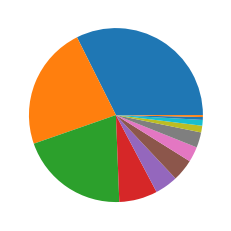

In [23]:
plt.pie(counts_genre)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([  2.,  20.,  38.,  56.,  74.,  92., 110., 128., 146., 164., 182.]),
 <a list of 12 Lists of Patches objects>)

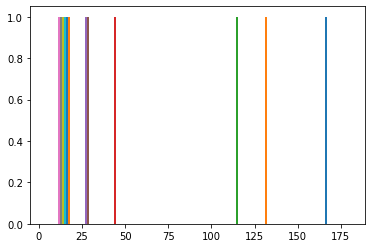

In [24]:
plt.hist(counts_genre)

# Visualizing the counts_genre

<BarContainer object of 12 artists>

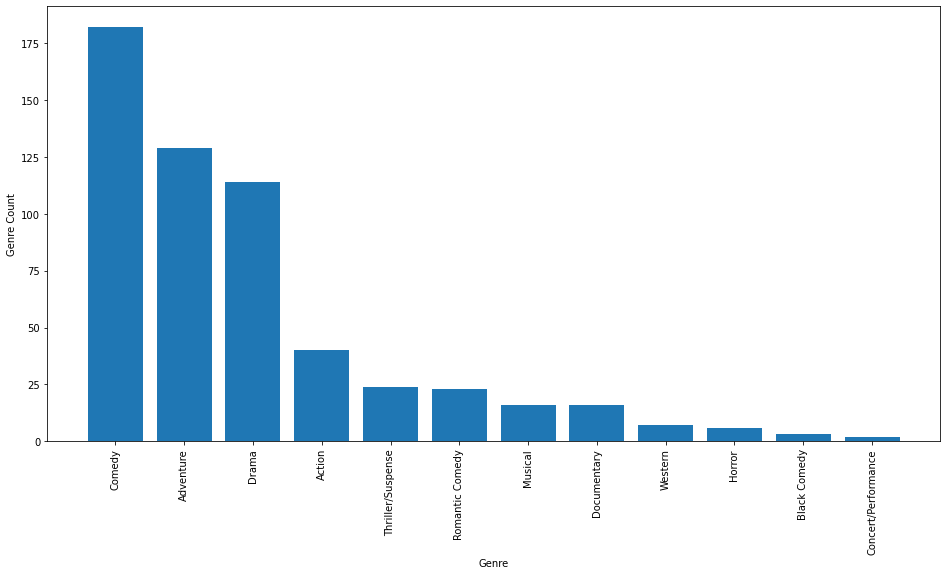

In [31]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.bar(counts_genre.index, counts_genre['count'])

In [33]:
df_disney['release_year'] = pd.DatetimeIndex(df_disney['release_date']).year
df_disney['release_year'].astype(int)
genre_group = df_disney.groupby('genre')

### Get the Comedy Genre

In [34]:
my_comedy=genre_group.get_group('Comedy')

In [35]:
my_comedy

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,adjusted_gross_millions,release_year
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1362.870985,1961
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574,310.094574,1961
11,Bon Voyage!,1962-05-17,Comedy,Not Rated,9230769,109581646,109.581646,1962
14,Blackbeard's Ghost,1968-02-08,Comedy,NaN,21540050,138612686,138.612686,1968
16,The Boatniks,1970-07-01,Comedy,NaN,18607492,101200742,101.200742,1970
...,...,...,...,...,...,...,...,...
528,Frankenweenie,2012-10-05,Comedy,PG,35287788,37363513,37.363513,2012
535,Disney Planes,2013-08-09,Comedy,PG,90282580,93614037,93.614037,2013
540,Delivery Man,2013-11-22,Comedy,PG-13,30659817,31787136,31.787136,2013
543,Muppets Most Wanted,2014-03-21,Comedy,PG,51178893,52807594,52.807594,2014


### What are the total number of Comedy Movies

In [37]:
print("The total number of comedy Movies are : " , len(my_comedy))

The total number of comedy Movies are :  182


In [45]:
comedy_movie_rating_count =my_comedy['mpaa_rating'].value_counts().to_frame().reset_index(drop=False).rename(columns={'index':'mpaa_rating','mpaa_rating':'count'})
comedy_movie_rating_count

,count,count
0,PG,77
1,PG-13,37
2,R,30
3,G,17
4,Not Rated,1


### Visualization

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(221)
label=['Number of movies', 'Highest number of movies']
plt.bar(comedy_movie_counts['release_year'], comedy_movie_counts['num_of_comedy_movies'])